# EDA

In [41]:
# Импорт необходимых библиотек для анализа данных
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Настройка стилей визуализации
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

In [42]:
# Указание пути к файлу с данными
path_to_data = "data/data.xlsx"

In [43]:
# Проверка размерности данных
df = pd.read_excel(path_to_data, engine="openpyxl")
print(f"Размерность загруженных данных: {df.shape}")
print(f"Столбцы: {df.shape[1]}, Строки: {df.shape[0]}")
print(f"Количество образцов (строк): {df.shape[0]}")
print(f"Количество признаков (столбцов): {df.shape[1]}")
print(f"Общий размер данных: {df.shape[0] * df.shape[1]:,} элементов")

Размерность загруженных данных: (1001, 214)
Столбцы: 214, Строки: 1001
Количество образцов (строк): 1001
Количество признаков (столбцов): 214
Общий размер данных: 214,214 элементов


In [44]:
display(df.head())

,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,...,0,0,0,0,0,0,0,0,3,0
1,1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,...,0,0,0,0,0,0,0,0,3,0
2,2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,...,0,0,0,0,0,0,0,0,3,0
3,3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,...,0,0,0,0,0,0,0,0,4,0
4,4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df

,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,384.652,...,0,0,0,0,0,0,0,0,3,0
1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,388.684,...,0,0,0,0,0,0,0,0,3,0
2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,446.808,...,0,0,0,0,0,0,0,0,3,0
3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,398.679,...,0,0,0,0,0,0,0,0,4,0
4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,466.713,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,31.000104,34.999650,1.129017,12.934891,12.934891,0.048029,-0.476142,0.382752,49.133333,414.542,...,0,0,0,0,0,0,0,0,0,0
997,31.999934,33.999415,1.062484,13.635345,13.635345,0.030329,-0.699355,0.369425,44.542857,485.621,...,0,0,0,0,0,0,0,0,0,0
998,30.999883,33.999458,1.096761,13.991690,13.991690,0.026535,-0.650790,0.284923,41.973684,545.742,...,1,0,0,0,0,0,0,0,0,0
999,31.998959,32.999644,1.031272,13.830180,13.830180,0.146522,-1.408652,0.381559,39.000000,522.635,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# Детальная информация о типах данных и памяти
df.info(memory_usage='deep')

data_types_stats = working_data.dtypes.value_counts()
for dtype, count in data_types_stats.items():
    print(f"{dtype}: {count} столбцов ({count/len(working_data.columns)*100:.1f}%)")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 213 entries, IC50, mM to fr_urea
dtypes: float64(107), int64(106)
memory usage: 1.6 MB
float64: 107 столбцов (50.2%)
int64: 106 столбцов (49.8%)


In [47]:
# Описательная статистика для числовых признаков
numeric_cols = df.select_dtypes(include=[np.number]).columns
stats_summary = df[numeric_cols].describe()

# Добавляем дополнительные статистики
additional_stats = pd.DataFrame({
    'mode': df[numeric_cols].mode().iloc[0],
    'variance': df[numeric_cols].var(),
    'skewness': df[numeric_cols].skew(),
    'kurtosis': df[numeric_cols].kurtosis()
}).T

# Объединяем статистики
enhanced_stats = pd.concat([stats_summary, additional_stats])
enhanced_stats

,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,...,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.0,1001.000000,1001.000000,1001.000000
mean,222.805156,589.110728,72.508823,10.831637,10.831637,0.180681,-0.967237,0.580412,29.487989,348.262234,...,0.053946,0.011988,0.008991,0.000999,0.000999,0.051948,0.0,0.069930,0.204795,0.006993
std,402.169734,642.867508,684.482739,3.307505,3.307505,0.168710,1.588036,0.212230,12.742749,126.946370,...,0.259011,0.108886,0.094441,0.031607,0.031607,0.222033,0.0,0.255157,1.215326,0.083373
min,0.003517,0.700808,0.011489,2.321942,2.321942,0.000039,-6.992796,0.059567,9.416667,110.156000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,12.515396,99.999036,1.433333,9.252350,9.252350,0.051073,-1.334487,0.442842,18.486486,264.321000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,46.585183,411.039342,3.846154,12.179236,12.179236,0.124606,-0.419485,0.634981,29.290323,315.457000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,224.975928,894.089176,16.566667,13.167843,13.167843,0.291020,0.061754,0.742483,38.750000,409.283000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,4128.529377,4538.976189,15620.600000,15.933463,15.933463,1.374614,1.374614,0.947265,60.272727,904.777000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,20.000000,1.000000
mode,0.200452,99.999036,1.000000,10.786697,10.786697,0.219687,-1.268911,0.442842,32.882353,244.207000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
variance,161740.495279,413278.633264,468516.619729,10.939590,10.939590,0.028463,2.521857,0.045042,162.377657,16115.380767,...,0.067087,0.011856,0.008919,0.000999,0.000999,0.049299,0.0,0.065105,1.477017,0.006951


### Заключение по анализу данных

1. Данные имеют разные масштабы - потребуется нормализация/стандартизация
2. Многие признаки имеют ненулевую асимметрию (skewness)
3. Значения kurtosis указывают на различия в "тяжести хвостов" распределений
4. Большая вариативность в значениях дисперсии между признаками

In [48]:
# Комплексная проверка на пропущенные значения

# Общая информация о пропусках
total_missing = df.isnull().sum().sum()
total_cells = df.shape[0] * working_data.shape[1]
missing_percentage = (total_missing / total_cells) * 100

print(f"Общее количество пропусков: {total_missing:,}")
print(f"Общее количество ячеек: {total_cells:,}")
print(f"Процент пропусков: {missing_percentage:.2f}%")

# Проверяем каждый столбец
missing_by_column = df.isnull().sum()
print(f"\nСтолбцов с пропусками: {(missing_by_column > 0).sum()}")
print(f"Столбцов без пропусков: {(missing_by_column == 0).sum()}")

Общее количество пропусков: 36
Общее количество ячеек: 213,213
Процент пропусков: 0.02%

Столбцов с пропусками: 12
Столбцов без пропусков: 201


                     Количество_пропусков  Процент_пропусков
MaxPartialCharge                        3                0.3
MinPartialCharge                        3                0.3
MaxAbsPartialCharge                     3                0.3
MinAbsPartialCharge                     3                0.3
BCUT2D_MWHI                             3                0.3
BCUT2D_MWLOW                            3                0.3
BCUT2D_CHGHI                            3                0.3
BCUT2D_CHGLO                            3                0.3
BCUT2D_LOGPHI                           3                0.3
BCUT2D_LOGPLOW                          3                0.3
BCUT2D_MRHI                             3                0.3
BCUT2D_MRLOW                            3                0.3


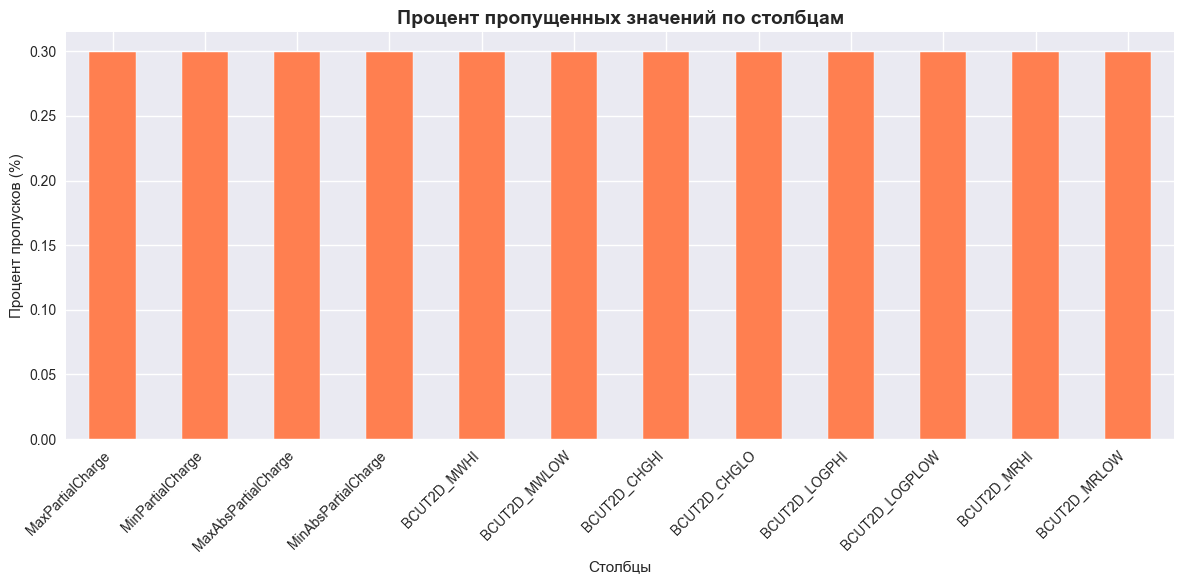

In [49]:
# Детальный анализ столбцов с пропущенными значениями
columns_with_missing = df.isnull().sum()
problematic_columns = columns_with_missing[columns_with_missing > 0]

if len(problematic_columns) > 0:
    # Создаем детальную таблицу
    missing_analysis = pd.DataFrame({
        'Количество_пропусков': problematic_columns,
        'Процент_пропусков': (problematic_columns / len(df)) * 100
    })
    missing_analysis = missing_analysis.sort_values('Количество_пропусков', ascending=False)
    
    print(missing_analysis.round(2))
    
    # Визуализация пропусков
    plt.figure(figsize=(12, 6))
    missing_analysis['Процент_пропусков'].plot(kind='bar', color='coral')
    plt.title('Процент пропущенных значений по столбцам', fontsize=14, fontweight='bold')
    plt.xlabel('Столбцы')
    plt.ylabel('Процент пропусков (%)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
else:
    print("Пропущенные значения не обнаружены!")

In [50]:
# Удаление записей с пропущенными значениями
rows_before = len(df)
cleaned_data = df.dropna()
rows_after = len(cleaned_data)
rows_removed = rows_before - rows_after

print(f"Количество записей до очистки: {rows_before:,}")
print(f"Количество записей после очистки: {rows_after:,}")
print(f"Удалено записей: {rows_removed}")
print(f"Процент удаленных записей: {(rows_removed/rows_before)*100:.2f}%")

# Проверяем, что пропусков больше нет
remaining_missing = cleaned_data.isnull().sum().sum()
print(f"Пропущенных значений осталось: {remaining_missing}")

if remaining_missing == 0:
    print("Д!")
else:
    print("Внимание: остались пропущенные значения")

Количество записей до очистки: 1,001
Количество записей после очистки: 998
Удалено записей: 3
Процент удаленных записей: 0.30%
Пропущенных значений осталось: 0
Д!


In [51]:
# Анализ дублированных записей

# Проверяем полные дубликаты
full_duplicates = cleaned_data.duplicated().sum()
print(f"Полных дубликатов: {full_duplicates}")

# Проверяем дубликаты по признакам (исключая целевые переменные)
target_columns = ['IC50, mM', 'CC50, mM', 'SI']
feature_columns = [col for col in cleaned_data.columns if col not in target_columns]

feature_duplicates = cleaned_data[feature_columns].duplicated().sum()
print(f"Дубликатов по признакам (без учета целевых): {feature_duplicates}")

if full_duplicates > 0:
    print(f"Обнаружено {full_duplicates} полных дубликатов")
    # Показываем примеры дубликатов
    duplicate_examples = cleaned_data[cleaned_data.duplicated(keep=False)]
    display(duplicate_examples.head())
else:
    print("Полные дубликаты не обнаружены")

Полных дубликатов: 32
Дубликатов по признакам (без учета целевых): 196
Обнаружено 32 полных дубликатов


,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
83,83.619244,2533.916472,30.303030,8.848320,8.848320,0.261583,0.261583,0.722639,44.571429,197.322,...,0,0,0,0,0,0,0,0,0,0
84,83.619244,2533.916472,30.303030,8.848320,8.848320,0.261583,0.261583,0.722639,44.571429,197.322,...,0,0,0,0,0,0,0,0,0,0
87,2200.501846,3284.331113,1.492537,11.810278,11.810278,0.006944,-0.006944,0.520631,46.818182,152.237,...,0,0,0,0,0,0,0,0,0,0
88,2200.501846,3284.331113,1.492537,11.810278,11.810278,0.006944,-0.006944,0.520631,46.818182,152.237,...,0,0,0,0,0,0,0,0,0,0
94,5.191051,195.662678,37.692308,5.503519,5.503519,0.397743,0.397743,0.715571,35.555556,250.430,...,0,0,0,0,0,0,0,0,3,0


In [52]:
# Удаление дублированных записей
if full_duplicates > 0:
    rows_before_dedup = len(cleaned_data)
    final_data = cleaned_data.drop_duplicates()
    rows_after_dedup = len(final_data)
    rows_removed_dedup = rows_before_dedup - rows_after_dedup
    print(f"Записей до удаления дубликатов: {rows_before_dedup:,}")
    print(f"Записей после удаления дубликатов: {rows_after_dedup:,}")
    print(f"Удалено дубликатов: {rows_removed_dedup}")

# Итоговая информация о данных
print(f"Строки: {final_data.shape[0]:,}")
print(f"Столбцы: {final_data.shape[1]:,}")
print(f"Общее сокращение данных: {((rows_before - len(final_data))/rows_before)*100:.2f}%")

Записей до удаления дубликатов: 998
Записей после удаления дубликатов: 966
Удалено дубликатов: 32
Строки: 966
Столбцы: 213
Общее сокращение данных: 3.50%


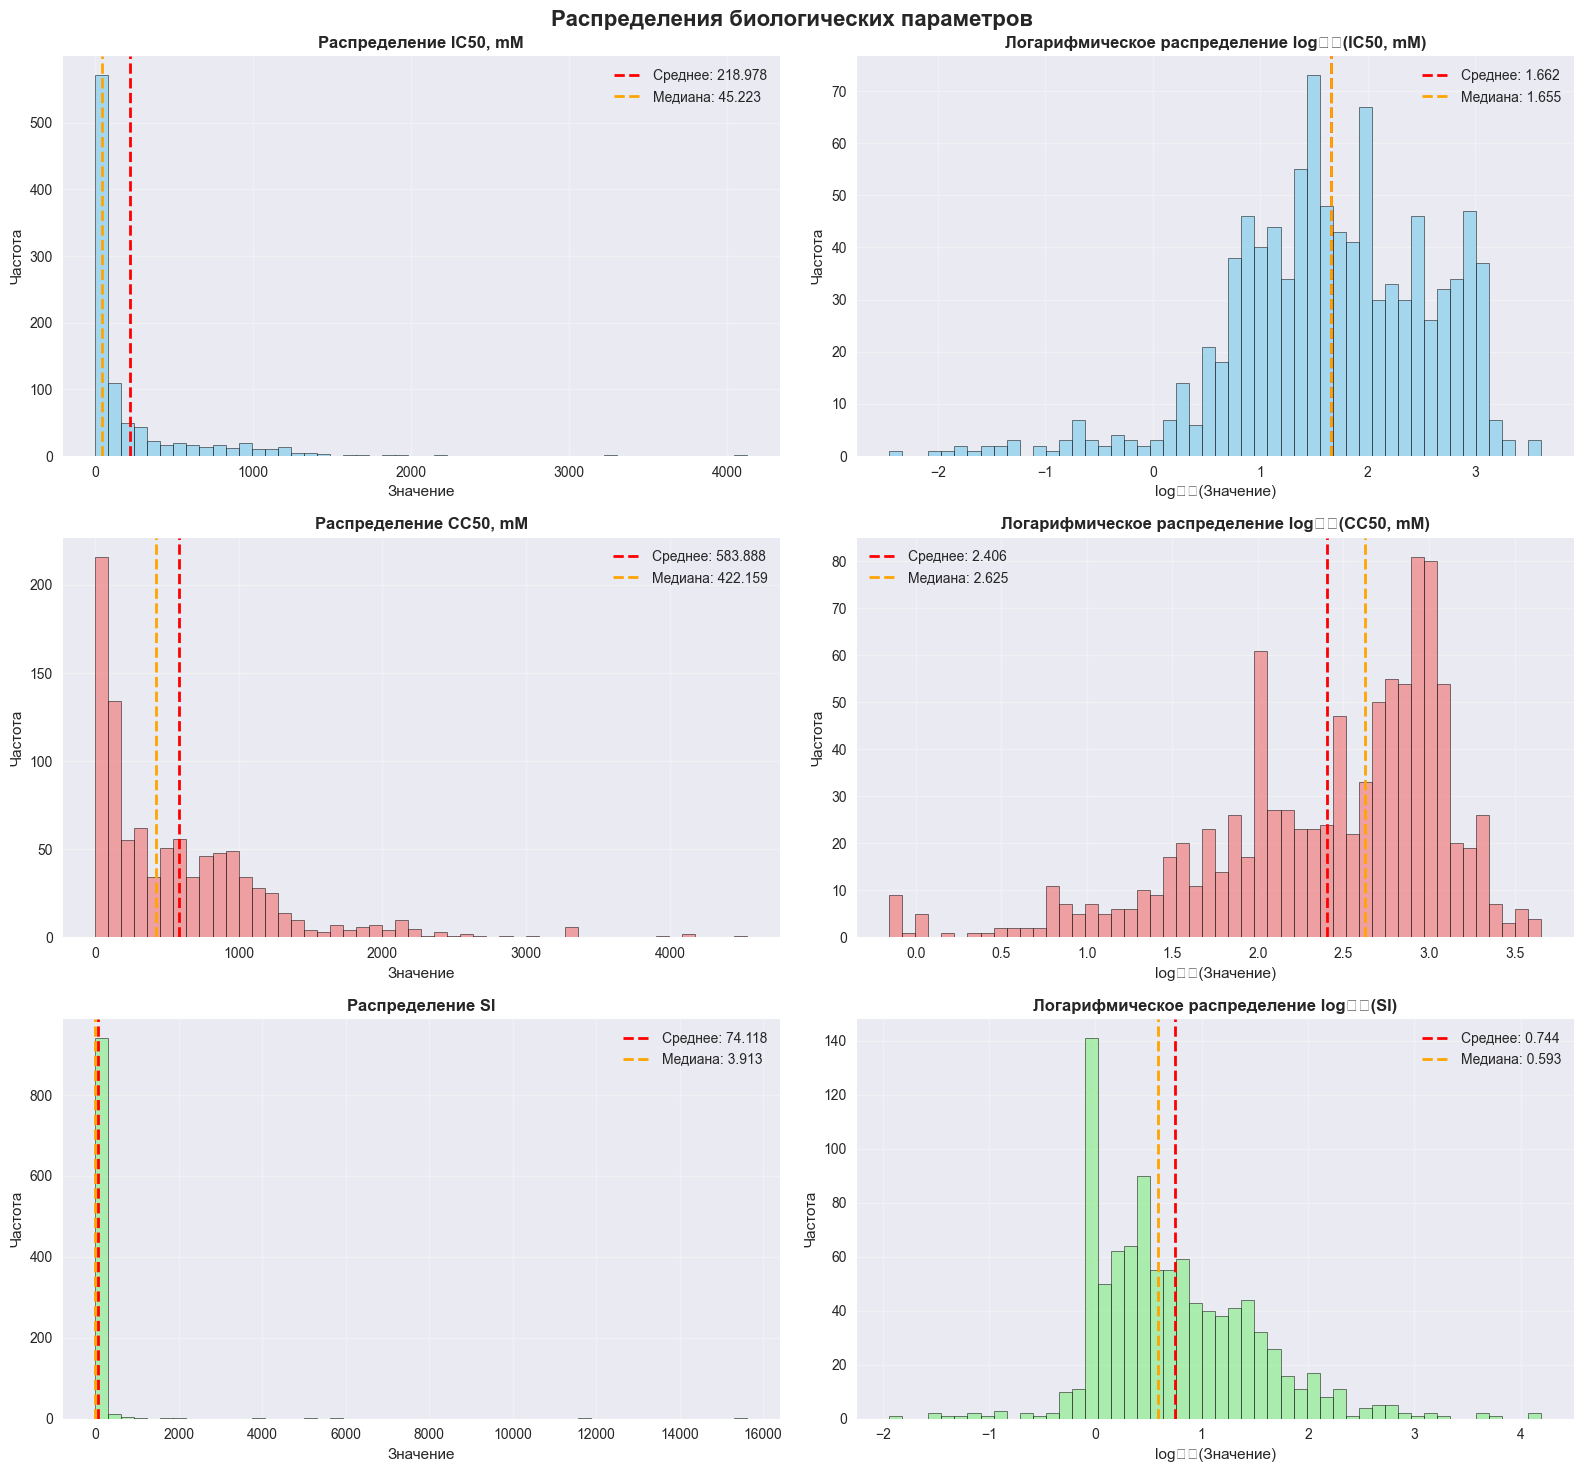

In [53]:
# Комплексный анализ распределений целевых переменных
target_variables = ['IC50, mM', 'CC50, mM', 'SI']
# Создаем фигуру для всех распределений
fig, axes = plt.subplots(3, 2, figsize=(16, 15))
fig.suptitle('Распределения биологических параметров', fontsize=16, fontweight='bold', y=0.98)

colors = ['skyblue', 'lightcoral', 'lightgreen']

for i, target_var in enumerate(target_variables):
    # Исключаем нулевые и отрицательные значения для логарифмирования
    data_positive = final_data[final_data[target_var] > 0][target_var]
    
    # Левый график - обычное распределение
    axes[i, 0].hist(data_positive, bins=50, alpha=0.7, color=colors[i], edgecolor='black', linewidth=0.5)
    axes[i, 0].set_title(f'Распределение {target_var}', fontweight='bold')
    axes[i, 0].set_xlabel('Значение')
    axes[i, 0].set_ylabel('Частота')
    axes[i, 0].grid(True, alpha=0.3)
    
    # Добавляем статистику на график
    mean_val = data_positive.mean()
    median_val = data_positive.median()
    axes[i, 0].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Среднее: {mean_val:.3f}')
    axes[i, 0].axvline(median_val, color='orange', linestyle='--', linewidth=2, label=f'Медиана: {median_val:.3f}')
    axes[i, 0].legend()
    
    # Правый график - логарифмическое распределение
    log_data = np.log10(data_positive)
    axes[i, 1].hist(log_data, bins=50, alpha=0.7, color=colors[i], edgecolor='black', linewidth=0.5)
    axes[i, 1].set_title(f'Логарифмическое распределение log₁₀({target_var})', fontweight='bold')
    axes[i, 1].set_xlabel('log₁₀(Значение)')
    axes[i, 1].set_ylabel('Частота')
    axes[i, 1].grid(True, alpha=0.3)
    
    # Статистика для логарифмических данных
    log_mean = log_data.mean()
    log_median = log_data.median()
    axes[i, 1].axvline(log_mean, color='red', linestyle='--', linewidth=2, label=f'Среднее: {log_mean:.3f}')
    axes[i, 1].axvline(log_median, color='orange', linestyle='--', linewidth=2, label=f'Медиана: {log_median:.3f}')
    axes[i, 1].legend()

plt.tight_layout()
plt.show()

### Выводы:
 1. Распределение похоже на логарифмическое
 2. Логарифмизация улучшит распределение, приведя его ближе к нормальному.
 3. Большое количество выбросов.

In [57]:
df

,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,384.652,...,0,0,0,0,0,0,0,0,3,0
1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,388.684,...,0,0,0,0,0,0,0,0,3,0
2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,446.808,...,0,0,0,0,0,0,0,0,3,0
3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,398.679,...,0,0,0,0,0,0,0,0,4,0
4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,466.713,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,31.000104,34.999650,1.129017,12.934891,12.934891,0.048029,-0.476142,0.382752,49.133333,414.542,...,0,0,0,0,0,0,0,0,0,0
997,31.999934,33.999415,1.062484,13.635345,13.635345,0.030329,-0.699355,0.369425,44.542857,485.621,...,0,0,0,0,0,0,0,0,0,0
998,30.999883,33.999458,1.096761,13.991690,13.991690,0.026535,-0.650790,0.284923,41.973684,545.742,...,1,0,0,0,0,0,0,0,0,0
999,31.998959,32.999644,1.031272,13.830180,13.830180,0.146522,-1.408652,0.381559,39.000000,522.635,...,0,0,0,0,0,0,0,0,0,0


In [66]:
df.corr()

,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
"IC50, mM",1.000000,0.521346,-0.056604,0.115239,0.115239,-0.093297,-0.188243,0.099990,-0.081246,-0.161218,...,-0.024282,0.019982,0.013160,0.016184,0.055927,-0.078305,NaN,0.012124,-0.050056,0.011559
"CC50, mM",0.521346,1.000000,-0.006818,-0.099244,-0.099244,0.072042,0.030524,0.106065,0.108977,-0.306439,...,-0.069594,-0.042238,-0.007527,0.018502,0.016960,-0.077815,NaN,-0.041800,-0.012982,0.081949
SI,-0.056604,-0.006818,1.000000,0.005866,0.005866,-0.054974,0.020784,0.040661,-0.004658,-0.040156,...,-0.019515,0.019262,-0.007321,-0.003247,-0.003305,-0.021316,NaN,-0.022067,-0.007451,-0.004861
MaxAbsEStateIndex,0.115239,-0.099244,0.005866,1.000000,1.000000,-0.663197,-0.529389,-0.171035,-0.422279,0.395163,...,-0.026203,0.059428,0.056969,-0.053254,0.011662,0.139802,NaN,0.110471,-0.206547,0.030636
MaxEStateIndex,0.115239,-0.099244,0.005866,1.000000,1.000000,-0.663197,-0.529389,-0.171035,-0.422279,0.395163,...,-0.026203,0.059428,0.056969,-0.053254,0.011662,0.139802,NaN,0.110471,-0.206547,0.030636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fr_thiazole,-0.078305,-0.077815,-0.021316,0.139802,0.139802,-0.093855,0.045643,-0.266402,-0.146376,0.361374,...,0.072942,-0.025785,-0.022296,-0.007402,-0.007402,1.000000,NaN,0.147629,-0.039465,-0.019644
fr_thiocyan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fr_thiophene,0.012124,-0.041800,-0.022067,0.110471,0.110471,-0.128620,0.062409,0.049621,-0.034712,0.137443,...,-0.042008,-0.030204,-0.026118,-0.008671,-0.008671,0.147629,NaN,1.000000,-0.046229,-0.023011
fr_unbrch_alkane,-0.050056,-0.012982,-0.007451,-0.206547,-0.206547,0.248255,0.092588,-0.253665,0.023919,0.214909,...,-0.019248,-0.018571,-0.016059,-0.005331,-0.005331,-0.039465,NaN,-0.046229,1.000000,-0.014148


In [69]:
targets = ['IC50, mM', 'CC50, mM', 'SI']
irrelevant_features_set = set()
for target in targets:
    print(target)
    correlations = df.corr()[target].abs().sort_values(ascending=False)
    irrelevant_features = correlations[correlations < 0.01].index
    print(irrelevant_features)
    irrelevant_features_set.update(list(irrelevant_features))
    
irrelevant_features_set

IC50, mM
Index(['SlogP_VSA2', 'NumHAcceptors', 'fr_nitro_arom', 'fr_oxazole',
       'fr_methoxy', 'fr_oxime', 'TPSA', 'fr_aldehyde', 'fr_NH1',
       'fr_aryl_methyl', 'fr_nitro_arom_nonortho'],
      dtype='object')
CC50, mM
Index(['fr_nitro_arom', 'NumSaturatedCarbocycles', 'fr_nitro_arom_nonortho',
       'fr_bicyclic', 'EState_VSA11', 'fr_sulfone', 'SI', 'fr_hdrzine',
       'PEOE_VSA14', 'fr_azo', 'PEOE_VSA4', 'fr_piperdine', 'fr_imidazole',
       'fr_aldehyde'],
      dtype='object')
SI
Index(['NumHeteroatoms', 'fr_nitro_arom', 'fr_nitro_arom_nonortho',
       'EState_VSA7', 'fr_amidine', 'EState_VSA1', 'fr_priamide',
       'fr_piperzine', 'fr_unbrch_alkane', 'fr_sulfone', 'CC50, mM', 'fr_azo',
       'fr_oxazole', 'MaxEStateIndex', 'MaxAbsEStateIndex', 'fr_oxime',
       'fr_hdrzine', 'SMR_VSA1', 'VSA_EState7', 'fr_urea', 'SPS', 'Ipc',
       'fr_nitrile', 'PEOE_VSA8', 'Kappa1', 'NumAliphaticCarbocycles',
       'fr_tetrazole', 'fr_Ar_COO', 'fr_term_acetylene', 'fr_HOCCN',
  

{'CC50, mM',
 'EState_VSA1',
 'EState_VSA11',
 'EState_VSA7',
 'Ipc',
 'Kappa1',
 'MaxAbsEStateIndex',
 'MaxEStateIndex',
 'NumAliphaticCarbocycles',
 'NumHAcceptors',
 'NumHeteroatoms',
 'NumSaturatedCarbocycles',
 'PEOE_VSA14',
 'PEOE_VSA4',
 'PEOE_VSA8',
 'SI',
 'SMR_VSA1',
 'SMR_VSA2',
 'SPS',
 'SlogP_VSA2',
 'TPSA',
 'VSA_EState7',
 'VSA_EState9',
 'fr_Ar_COO',
 'fr_HOCCN',
 'fr_NH1',
 'fr_aldehyde',
 'fr_amidine',
 'fr_aryl_methyl',
 'fr_azo',
 'fr_bicyclic',
 'fr_epoxide',
 'fr_hdrzine',
 'fr_imidazole',
 'fr_methoxy',
 'fr_nitrile',
 'fr_nitro_arom',
 'fr_nitro_arom_nonortho',
 'fr_oxazole',
 'fr_oxime',
 'fr_piperdine',
 'fr_piperzine',
 'fr_priamide',
 'fr_sulfone',
 'fr_term_acetylene',
 'fr_tetrazole',
 'fr_unbrch_alkane',
 'fr_urea'}

Найдено 47 фичей, которые имеют корреляцию с одинм из таргетов < 0.01

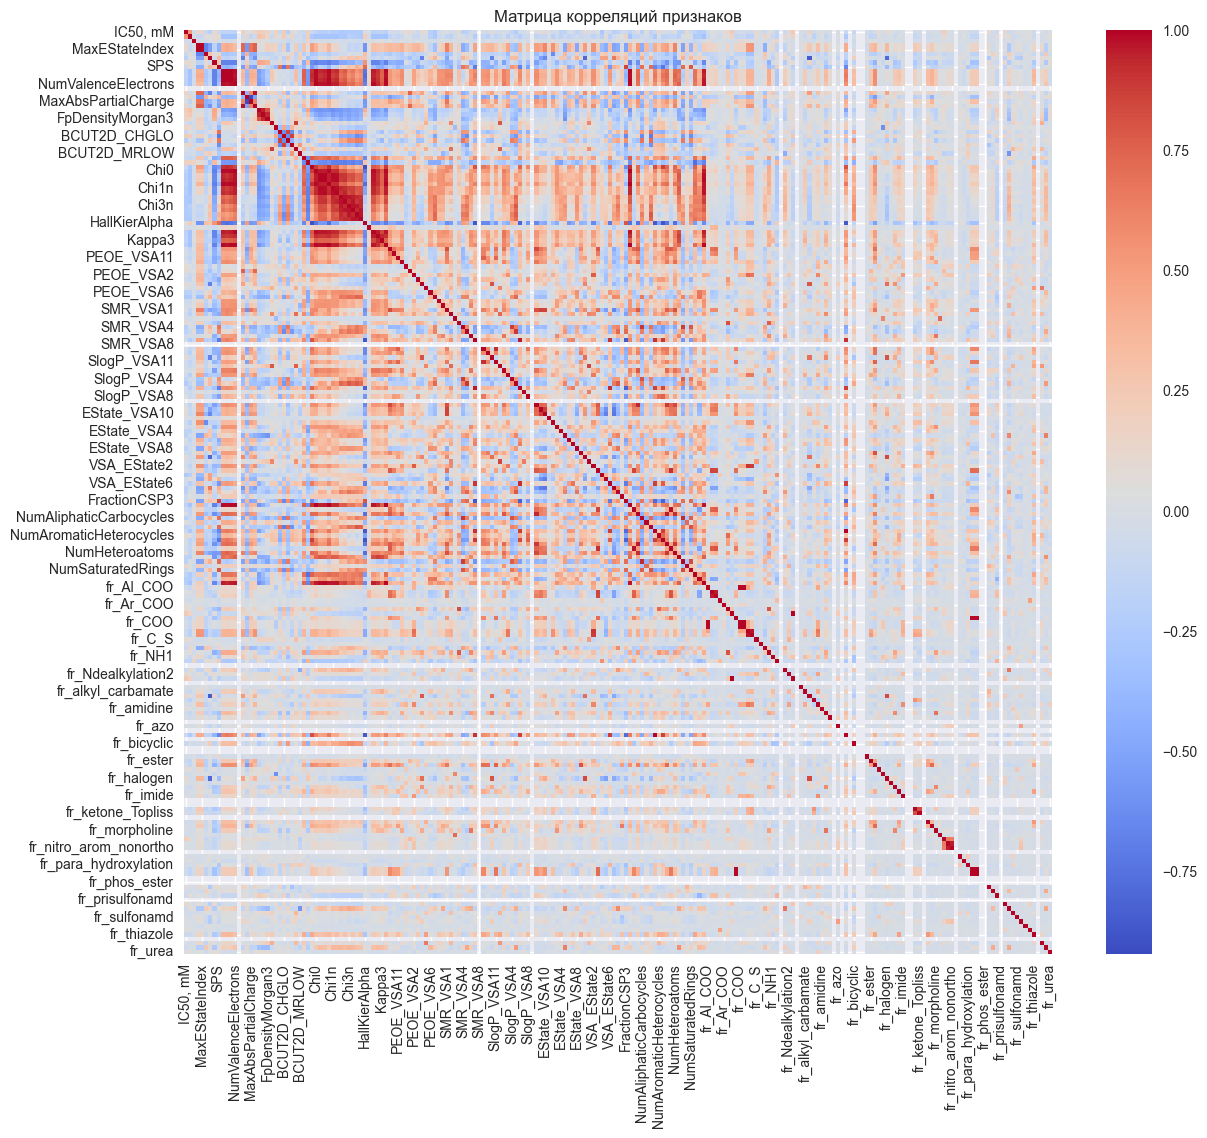

In [70]:
# Вычисление матрицы корреляций
corr_matrix = df.corr()

# Визуализация матрицы корреляций
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Матрица корреляций признаков")
plt.show()

In [71]:
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            pair = (corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])
            high_corr_pairs.append(pair)

print("\nПары признаков с корреляцией > 0.9:")
for pair in high_corr_pairs:
    print(f"{pair[0]} и {pair[1]}: {pair[2]:.2f}")


Пары признаков с корреляцией > 0.9:
MaxAbsEStateIndex и MaxEStateIndex: 1.00
MolWt и HeavyAtomMolWt: 1.00
MolWt и ExactMolWt: 1.00
MolWt и NumValenceElectrons: 0.98
MolWt и BertzCT: 0.90
MolWt и Chi0: 0.99
MolWt и Chi0n: 0.93
MolWt и Chi0v: 0.95
MolWt и Chi1: 0.99
MolWt и Chi1n: 0.90
MolWt и Chi1v: 0.93
MolWt и Kappa1: 0.96
MolWt и Kappa2: 0.91
MolWt и LabuteASA: 0.99
MolWt и HeavyAtomCount: 0.99
MolWt и MolMR: 0.96
HeavyAtomMolWt и ExactMolWt: 1.00
HeavyAtomMolWt и NumValenceElectrons: 0.97
HeavyAtomMolWt и BertzCT: 0.93
HeavyAtomMolWt и Chi0: 0.98
HeavyAtomMolWt и Chi0n: 0.91
HeavyAtomMolWt и Chi0v: 0.93
HeavyAtomMolWt и Chi1: 0.98
HeavyAtomMolWt и Kappa1: 0.94
HeavyAtomMolWt и LabuteASA: 0.98
HeavyAtomMolWt и HeavyAtomCount: 0.98
HeavyAtomMolWt и MolMR: 0.94
ExactMolWt и NumValenceElectrons: 0.98
ExactMolWt и BertzCT: 0.90
ExactMolWt и Chi0: 0.99
ExactMolWt и Chi0n: 0.93
ExactMolWt и Chi0v: 0.95
ExactMolWt и Chi1: 0.99
ExactMolWt и Chi1n: 0.90
ExactMolWt и Chi1v: 0.93
ExactMolWt и 

Часть признаков имеют сильную прямую и обратную корреляцию. Имеется мультиколлиенарность и линейная зависимость. Проведём отбор признаков по трэшхолду 0.9, учитывая влиянеие на целевые переменные

In [72]:
def detect_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]

In [73]:
# Подсчёт выбросов для всех признаков
outlier_counts = {}
for col in df.columns:
    cnt = detect_outliers(col)
    if cnt > 0:
        outlier_counts[col] = cnt

In [75]:
print("Количество выбросов в признаке:")
for col in df.columns:
    print(f"{col}: {detect_outliers(col)} выбросов")

Количество выбросов в признаке:
IC50, mM: 147 выбросов
CC50, mM: 39 выбросов
SI: 125 выбросов
MaxAbsEStateIndex: 19 выбросов
MaxEStateIndex: 19 выбросов
MinAbsEStateIndex: 21 выбросов
MinEStateIndex: 128 выбросов
qed: 0 выбросов
SPS: 0 выбросов
MolWt: 46 выбросов
HeavyAtomMolWt: 37 выбросов
ExactMolWt: 48 выбросов
NumValenceElectrons: 58 выбросов
NumRadicalElectrons: 0 выбросов
MaxPartialCharge: 0 выбросов
MinPartialCharge: 5 выбросов
MaxAbsPartialCharge: 4 выбросов
MinAbsPartialCharge: 0 выбросов
FpDensityMorgan1: 3 выбросов
FpDensityMorgan2: 31 выбросов
FpDensityMorgan3: 50 выбросов
BCUT2D_MWHI: 39 выбросов
BCUT2D_MWLOW: 8 выбросов
BCUT2D_CHGHI: 24 выбросов
BCUT2D_CHGLO: 3 выбросов
BCUT2D_LOGPHI: 4 выбросов
BCUT2D_LOGPLOW: 38 выбросов
BCUT2D_MRHI: 153 выбросов
BCUT2D_MRLOW: 71 выбросов
AvgIpc: 0 выбросов
BalabanJ: 39 выбросов
BertzCT: 37 выбросов
Chi0: 42 выбросов
Chi0n: 61 выбросов
Chi0v: 66 выбросов
Chi1: 40 выбросов
Chi1n: 53 выбросов
Chi1v: 59 выбросов
Chi2n: 34 выбросов
Chi2v: 2

In [76]:
print("Количество выбросов в признаках:")
for key, value in outlier_counts.items():
    print(f"{key}: {value}")


Количество выбросов в признаках:
IC50, mM: 147
CC50, mM: 39
SI: 125
MaxAbsEStateIndex: 19
MaxEStateIndex: 19
MinAbsEStateIndex: 21
MinEStateIndex: 128
MolWt: 46
HeavyAtomMolWt: 37
ExactMolWt: 48
NumValenceElectrons: 58
MinPartialCharge: 5
MaxAbsPartialCharge: 4
FpDensityMorgan1: 3
FpDensityMorgan2: 31
FpDensityMorgan3: 50
BCUT2D_MWHI: 39
BCUT2D_MWLOW: 8
BCUT2D_CHGHI: 24
BCUT2D_CHGLO: 3
BCUT2D_LOGPHI: 4
BCUT2D_LOGPLOW: 38
BCUT2D_MRHI: 153
BCUT2D_MRLOW: 71
BalabanJ: 39
BertzCT: 37
Chi0: 42
Chi0n: 61
Chi0v: 66
Chi1: 40
Chi1n: 53
Chi1v: 59
Chi2n: 34
Chi2v: 27
Chi3n: 51
Chi3v: 42
Chi4n: 49
Chi4v: 54
HallKierAlpha: 2
Ipc: 218
Kappa1: 49
Kappa2: 63
Kappa3: 64
LabuteASA: 55
PEOE_VSA1: 40
PEOE_VSA10: 52
PEOE_VSA11: 123
PEOE_VSA12: 69
PEOE_VSA13: 185
PEOE_VSA14: 14
PEOE_VSA2: 24
PEOE_VSA3: 49
PEOE_VSA4: 205
PEOE_VSA5: 166
PEOE_VSA6: 24
PEOE_VSA7: 41
PEOE_VSA8: 5
PEOE_VSA9: 34
SMR_VSA1: 20
SMR_VSA10: 26
SMR_VSA2: 11
SMR_VSA3: 11
SMR_VSA4: 22
SMR_VSA5: 27
SMR_VSA6: 48
SMR_VSA9: 141
SlogP_VSA1: 8


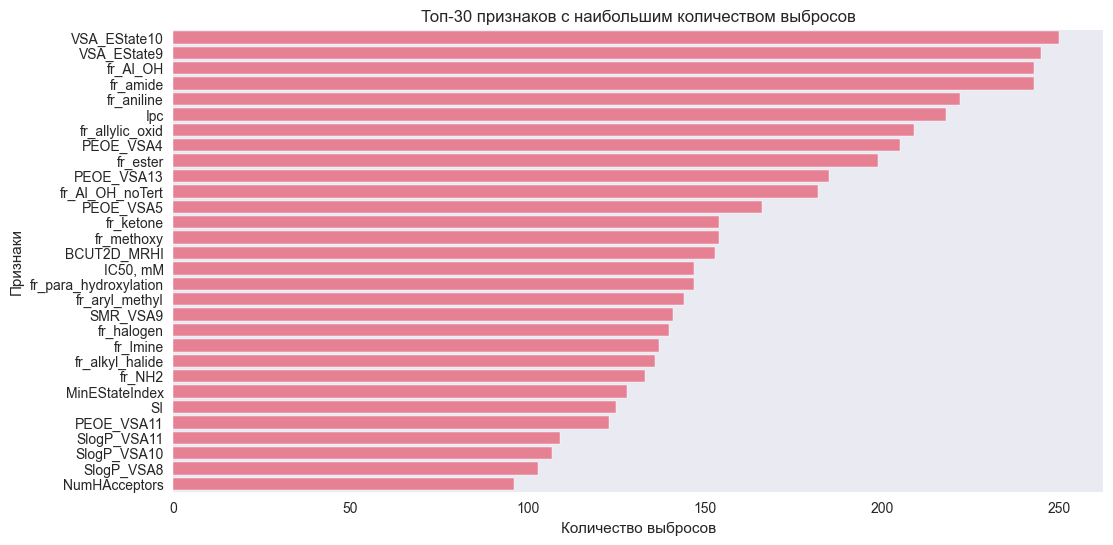

In [77]:
# Визуализируем топ 30 признаков с выбросами
top_outliers = dict(sorted(outlier_counts.items(), key=lambda x: x[1], reverse=True)[:30])
plt.figure(figsize=(12, 6))
sns.barplot(x=list(top_outliers.values()), y=list(top_outliers.keys()))
plt.title("Топ-30 признаков с наибольшим количеством выбросов")
plt.xlabel("Количество выбросов")
plt.ylabel("Признаки")
plt.grid(axis='x')
plt.show()

In [78]:
low_variance = df.var()[df.var() == 0].index
low_variance

Index(['NumRadicalElectrons', 'SMR_VSA8', 'SlogP_VSA9', 'fr_N_O', 'fr_SH',
       'fr_azide', 'fr_barbitur', 'fr_benzodiazepine', 'fr_diazo',
       'fr_dihydropyridine', 'fr_isocyan', 'fr_isothiocyan', 'fr_lactam',
       'fr_nitroso', 'fr_phos_acid', 'fr_phos_ester', 'fr_prisulfonamd',
       'fr_thiocyan'],
      dtype='object')

In [79]:
df = df.drop(columns=low_variance)

In [80]:
df.shape

(1001, 195)

In [81]:
high_corr_features_count = {}
for it in high_corr_pairs:
    high_corr_features_count[it[0]] = high_corr_features_count.get(it[0], 0) + 1
    high_corr_features_count[it[1]] = high_corr_features_count.get(it[1], 0) + 1
    
dict(sorted(list(high_corr_features_count.items()), key=lambda x: x[1], reverse=True))

{'MolWt': 15,
 'ExactMolWt': 15,
 'Chi1': 15,
 'HeavyAtomCount': 15,
 'NumValenceElectrons': 14,
 'Chi0': 14,
 'Chi0n': 14,
 'Chi0v': 14,
 'Chi1n': 14,
 'Chi1v': 14,
 'Kappa1': 14,
 'LabuteASA': 14,
 'MolMR': 14,
 'HeavyAtomMolWt': 12,
 'Kappa2': 10,
 'Chi2n': 8,
 'Chi2v': 7,
 'BertzCT': 6,
 'Chi3n': 5,
 'Chi3v': 5,
 'Chi4v': 5,
 'Chi4n': 4,
 'SMR_VSA7': 4,
 'NOCount': 3,
 'FpDensityMorgan2': 2,
 'SlogP_VSA6': 2,
 'VSA_EState6': 2,
 'NumAromaticCarbocycles': 2,
 'fr_benzene': 2,
 'fr_C_O': 2,
 'NumHDonors': 2,
 'fr_Al_COO': 2,
 'fr_COO': 2,
 'fr_COO2': 2,
 'fr_Ar_OH': 2,
 'fr_phenol': 2,
 'fr_phenol_noOrthoHbond': 2,
 'MaxAbsEStateIndex': 1,
 'MaxEStateIndex': 1,
 'MaxPartialCharge': 1,
 'MinAbsPartialCharge': 1,
 'MinPartialCharge': 1,
 'MaxAbsPartialCharge': 1,
 'FpDensityMorgan1': 1,
 'FpDensityMorgan3': 1,
 'HallKierAlpha': 1,
 'Kappa3': 1,
 'SMR_VSA9': 1,
 'SlogP_VSA11': 1,
 'TPSA': 1,
 'VSA_EState2': 1,
 'VSA_EState3': 1,
 'NHOHCount': 1,
 'NumHAcceptors': 1,
 'NumHeteroatoms': 1

In [82]:
cols_to_drop = set()
for col1, col2, value in high_corr_pairs:
    if col2 in df:
        cols_to_drop.add(col2)

df = df.drop(cols_to_drop, axis=1)

In [83]:
df.shape

(1001, 148)

In [85]:
# Стандартизация данных
features = df.columns[3:]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])
df_scaled = pd.DataFrame(scaled_features, columns=features)
df_scaled[targets] = df[targets].values
df_scaled.head()

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM","CC50, mM",SI
0,-1.735571,1.224868,0.853343,-0.768654,1.055290,0.286798,-1.522105,1.500099,-2.076304,-0.576677,...,-0.09525,-0.031623,-0.031623,-0.234082,-0.274204,2.301113,-0.083918,6.239374,175.482382,28.125000
1,-2.078199,2.094509,0.945732,-0.555991,1.234754,0.318575,-1.722757,1.238276,-2.224521,-0.566152,...,-0.09525,-0.031623,-0.031623,-0.234082,-0.274204,2.301113,-0.083918,0.771831,5.402819,7.000000
2,-2.481816,2.150030,0.951630,-1.506141,0.997105,0.776667,-1.089544,1.078060,-2.409791,-0.540065,...,-0.09525,-0.031623,-0.031623,-0.234082,-0.274204,2.301113,-0.083918,223.808778,161.142320,0.720000
3,-1.734583,1.244900,0.855471,-0.954942,0.971554,0.397349,-1.522105,1.500099,-2.168300,-0.576750,...,-0.09525,-0.031623,-0.031623,-0.234082,-0.274204,3.124349,-0.083918,1.705624,107.855654,63.235294
4,-1.718506,0.532513,0.779788,-0.713608,0.551671,0.933544,-1.336166,1.977954,-2.254164,-0.576068,...,-0.09525,-0.031623,-0.031623,-0.234082,-0.274204,-0.168595,-0.083918,107.131532,139.270991,1.300000


In [ ]:
df_scaled.to_parquet("data/processed_data_full.parquet")